## Observations and Insights 

In [152]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
all_data = pd.merge(mouse_metadata,study_results, how="outer", on=["Mouse ID"])

# Display the data table for preview
all_data

Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0        k403     Ramicane  Male          21          16          0   
1        k403     Ramicane  Male          21          16          5   
2        k403     Ramicane  Male          21          16         10   
3        k403     Ramicane  Male          21          16         15   
4        k403     Ramicane  Male          21          16         20   
...       ...          ...   ...         ...         ...        ...   
1888     z969     Naftisol  Male           9          30         25   
1889     z969     Naftisol  Male           9          30         30   
1890     z969     Naftisol  Male           9          30         35   
1891     z969     Naftisol  Male           9          30         40   
1892     z969     Naftisol  Male           9          30         45   

      Tumour Volume (mm3)  Metastatic Sites  
0               45.000000                 0  
1               38.825898                 0  
2               35.014271                 1  
3               34.223992                 1  
4               32.997729                 1  
...                   ...               ...  
1888            63.145652                 2  
1889            65.841013                 3  
1890            69.176246                 4  
1891            70.314904                 4  
1892            73.867845                 4  

[1893 rows x 8 columns]

In [153]:
# Checking the number of mice.
mice_id = all_data["Mouse ID"].unique()
mice_number = len(mice_id)
mice_number

249

In [154]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice_id = all_data.loc[all_data.duplicated(subset=['Mouse ID', 'Timepoint',]),'Mouse ID'].unique()
duplicate_mice_id


array(['g989'], dtype=object)

In [155]:
# Optional: Get all the data for the duplicate mouse ID. 

duplicate_mice_df = all_data.loc[all_data["Mouse ID"] == "g989", :]
duplicate_mice_df

Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
908     g989     Propriva  Female          21          26          0   
909     g989     Propriva  Female          21          26          0   
910     g989     Propriva  Female          21          26          5   
911     g989     Propriva  Female          21          26          5   
912     g989     Propriva  Female          21          26         10   
913     g989     Propriva  Female          21          26         10   
914     g989     Propriva  Female          21          26         15   
915     g989     Propriva  Female          21          26         15   
916     g989     Propriva  Female          21          26         20   
917     g989     Propriva  Female          21          26         20   
918     g989     Propriva  Female          21          26         25   
919     g989     Propriva  Female          21          26         30   
920     g989     Propriva  Female          21          26         35   

     Tumour Volume (mm3)  Metastatic Sites  
908            45.000000                 0  
909            45.000000                 0  
910            48.786801                 0  
911            47.570392                 0  
912            51.745156                 0  
913            49.880528                 0  
914            51.325852                 1  
915            53.442020                 0  
916            55.326122                 1  
917            54.657650                 1  
918            56.045564                 1  
919            59.082294                 1  
920            62.570880                 2

In [156]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = all_data[all_data['Mouse ID'].isin(duplicate_mice_id)==False]

clean_df.head()

Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0     k403     Ramicane  Male          21          16          0   
1     k403     Ramicane  Male          21          16          5   
2     k403     Ramicane  Male          21          16         10   
3     k403     Ramicane  Male          21          16         15   
4     k403     Ramicane  Male          21          16         20   

   Tumour Volume (mm3)  Metastatic Sites  
0            45.000000                 0  
1            38.825898                 0  
2            35.014271                 1  
3            34.223992                 1  
4            32.997729                 1

In [157]:
# Checking the number of mice in the clean DataFrame.
clean_mouse_id = clean_df["Mouse ID"].unique()
clean_mouse_count = len(clean_mouse_id)
clean_mouse_count

248

## Summary Statistics

In [158]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumour volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumour volume. 

mean = clean_df['Tumour Volume (mm3)'].groupby(clean_df['Drug Regimen']).mean()
median = clean_df['Tumour Volume (mm3)'].groupby(clean_df['Drug Regimen']).median()
var = clean_df['Tumour Volume (mm3)'].groupby(clean_df['Drug Regimen']).var()
std = clean_df['Tumour Volume (mm3)'].groupby(clean_df['Drug Regimen']).std()
sem = clean_df['Tumour Volume (mm3)'].groupby(clean_df['Drug Regimen']).sem()

# Assemble the resulting series into a single summary dataframe.
summary_statistics_df = pd.DataFrame({"Mean Tumour Volume":mean, 
                            "Median Tumour Volume":median, 
                            "Tumour Volume Variance":var, 
                            "Tumour Volume Std. Dev.":std, 
                            "Tumour Volume SEM.":sem})

summary_statistics_df


Mean Tumour Volume  Median Tumour Volume  \
Drug Regimen                                             
Capomulin              40.675741             41.557809   
Ceftamin               52.591172             51.776157   
Infubinol              52.884795             51.820584   
Ketapril               55.235638             53.698743   
Naftisol               54.331565             52.509285   
Placebo                54.033581             52.288934   
Propriva               52.320930             50.446266   
Ramicane               40.216745             40.673236   
Stelasyn               54.233149             52.431737   
Zoniferol              53.236507             51.818479   

              Tumour Volume Variance  Tumour Volume Std. Dev.  \
Drug Regimen                                                    
Capomulin                  24.947764                 4.994774   
Ceftamin                   39.290177                 6.268188   
Infubinol                  43.128684                 6.567243   
Ketapril                   68.553577                 8.279709   
Naftisol                   66.173479                 8.134708   
Placebo                    61.168083                 7.821003   
Propriva                   43.852013                 6.622085   
Ramicane                   23.486704                 4.846308   
Stelasyn                   59.450562                 7.710419   
Zoniferol                  48.533355                 6.966589   

              Tumour Volume SEM.  
Drug Regimen                      
Capomulin               0.329346  
Ceftamin                0.469821  
Infubinol               0.492236  
Ketapril                0.603860  
Naftisol                0.596466  
Placebo                 0.581331  
Propriva                0.544332  
Ramicane                0.320955  
Stelasyn                0.573111  
Zoniferol               0.516398

In [159]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumour volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
summary_statistics_agg =  clean_df.groupby(['Drug Regimen'])[['Tumour Volume (mm3)']].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_statistics_agg

Tumour Volume (mm3)                                          
                            mean     median        var       std       sem
Drug Regimen                                                              
Capomulin              40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin               52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol              52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril               55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol               54.331565  52.509285  66.173479  8.134708  0.596466
Placebo                54.033581  52.288934  61.168083  7.821003  0.581331
Propriva               52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane               40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn               54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol              53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

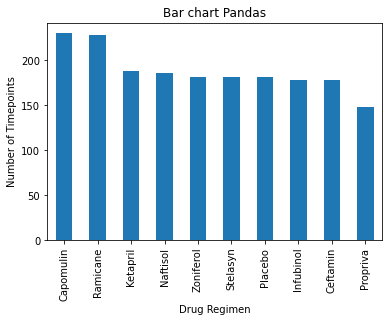

In [160]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
mice_per_treat = clean_df["Drug Regimen"].value_counts()
mice_per_treat.plot(kind="bar")
plt.title('Bar chart Pandas')
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Timepoints")
plt.show()


In [161]:
mice_per_treat.values

array([230, 228, 188, 186, 182, 181, 181, 178, 178, 148], dtype=int64)

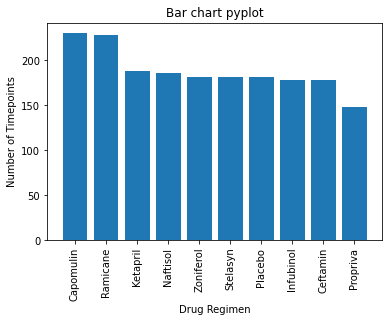

In [162]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
mice_per_treat = clean_df["Drug Regimen"].value_counts()
plt.bar(mice_per_treat.index, mice_per_treat.values)
plt.xticks(rotation="vertical")

plt.title('Bar chart pyplot')
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Timepoints")


plt.show()


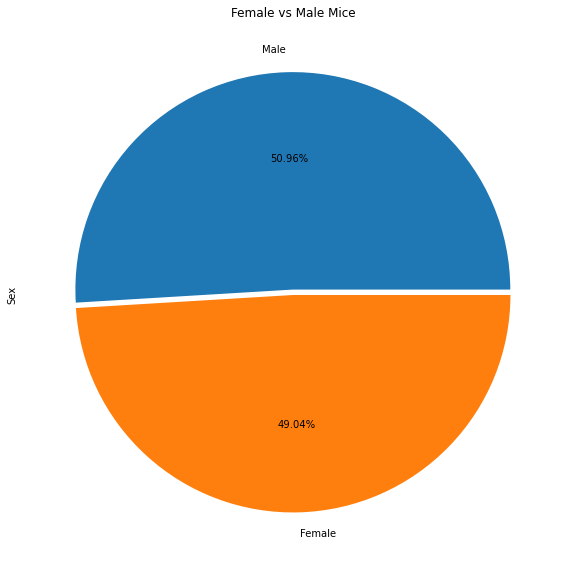

In [163]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_data = clean_df["Sex"].value_counts()
plt.title("Female vs Male Mice")
gender_data.plot(kind='pie', autopct= "%1.2f%%", figsize=(10,10), explode=(0.025,0))
plt.show()


In [164]:
gender_data

Male      958
Female    922
Name: Sex, dtype: int64

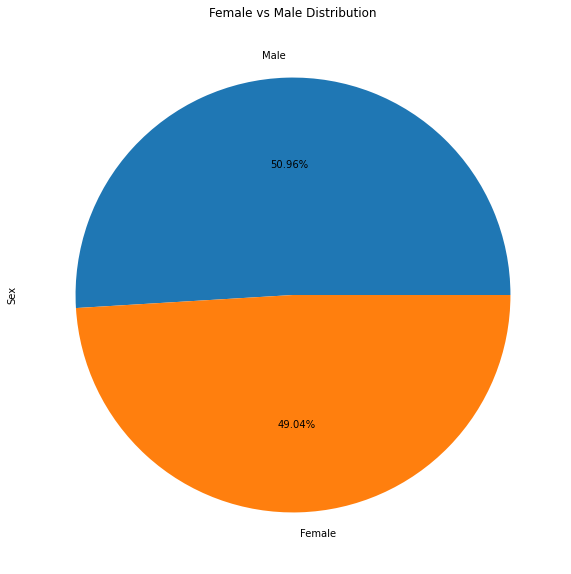

In [165]:
# Generate a pie plot showing the distribution of female versus male mice using pyplo
data_labels_pie = gender_data.index
data_pie = gender_data.values
#set fig size
fig = plt.figure(figsize =(10, 10))


plt.pie(data_pie,labels = data_labels_pie, autopct="%1.2f%%")
#set title and label
plt.title('Female vs Male Distribution')
plt.ylabel('Sex')

plt.show()


## Quartiles, Outliers and Boxplots

In [166]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
Capomulin_df = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin",:]
Ramicane_df = clean_df.loc[clean_df["Drug Regimen"] == "Ramicane", :]
Infubinol_df = clean_df.loc[clean_df["Drug Regimen"] == "Infubinol", :]
Ceftamin_df = clean_df.loc[clean_df["Drug Regimen"] == "Ceftamin", :]


# Start by getting the last (greatest) timepoint for each mouse
Capomulin_last = Capomulin_df.groupby('Mouse ID').max()['Timepoint']
Ramicane_last = Ramicane_df.groupby('Mouse ID').max()['Timepoint']
Infubinol_last = Infubinol_df.groupby('Mouse ID').max()['Timepoint']
Ceftamin_last = Ceftamin_df.groupby('Mouse ID').max()['Timepoint']

# Merge this group df with the original dataframe to get the tumour volume at the last timepoint
Capomulin_vol = pd.DataFrame(Capomulin_last)
Ramicane_vol = pd.DataFrame(Ramicane_last)
Infubinol_vol = pd.DataFrame(Infubinol_last)
Ceftamin_vol = pd.DataFrame(Ceftamin_last)

Capomulin_merge = pd.merge(Capomulin_vol, clean_df[["Mouse ID","Drug Regimen","Timepoint",'Tumour Volume (mm3)']], on=("Mouse ID","Timepoint"),how="left")
Ramicane_merge = pd.merge(Ramicane_last, clean_df[["Mouse ID", "Drug Regimen","Timepoint",'Tumour Volume (mm3)']], on=("Mouse ID","Timepoint"),how="left")
Infubinol_merge = pd.merge(Infubinol_last, clean_df[["Mouse ID", "Drug Regimen","Timepoint",'Tumour Volume (mm3)']], on=("Mouse ID","Timepoint"),how="left")
Ceftamin_merge = pd.merge(Ceftamin_last, clean_df[["Mouse ID", "Drug Regimen","Timepoint",'Tumour Volume (mm3)']], on=("Mouse ID","Timepoint"),how="left")


merge_tumour_df = pd.concat([Capomulin_merge, Ramicane_merge, Infubinol_merge, Ceftamin_merge])
merge_tumour_df

Mouse ID  Timepoint Drug Regimen  Tumour Volume (mm3)
0      b128         45    Capomulin            38.982878
1      b742         45    Capomulin            38.939633
2      f966         20    Capomulin            30.485985
3      g288         45    Capomulin            37.074024
4      g316         45    Capomulin            40.159220
..      ...        ...          ...                  ...
20     x226          0     Ceftamin            45.000000
21     x581         45     Ceftamin            64.634949
22     x822         45     Ceftamin            61.386660
23     y769         45     Ceftamin            68.594745
24     y865         45     Ceftamin            64.729837

[100 rows x 4 columns]

In [167]:
# Put treatments into a list for for loop (and later for plot labels)
treatments_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumour vol data (for plotting)
tumour_vol_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

for treatment in treatments_list:
    
    # Locate the rows which contain mice on each drug and get the tumour volumes
    mice_tumour_vol =  merge_tumour_df.loc[merge_tumour_df['Drug Regimen'] == treatment, 'Tumour Volume (mm3)']  
    
    # add subset 
    tumour_vol_list.append(mice_tumour_vol)
    
    # Determine outliers using upper and lower bounds
    
    quartiles = mice_tumour_vol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq


    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    outliers = mice_tumour_vol.loc[(mice_tumour_vol < lower_bound) | (mice_tumour_vol > upper_bound)]
    if len(outliers) > 0:
        print(f'The only outliers identified are the following:')
        print(f'The outliers for {treatment} are {outliers}.')
       


The only outliers identified are the following:
The outliers for Infubinol are 5    36.321346
Name: Tumour Volume (mm3), dtype: float64.


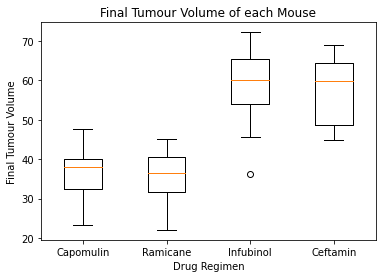

In [168]:
# Generate a box plot of the final tumour volume of each mouse across four regimens of interest
plt.boxplot(tumour_vol_list, labels = treatments_list)
plt.xlabel("Drug Regimen")
plt.ylabel('Final Tumour Volume')
plt.title('Final Tumour Volume of each Mouse')
plt.show()




## Line and Scatter Plots

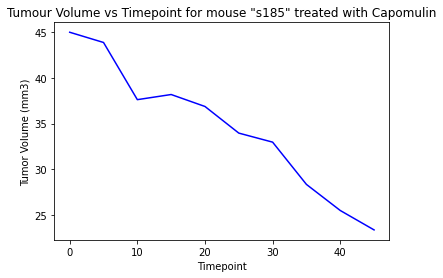

In [169]:
# Generate a line plot of tumour volume vs. time point for a mouse treated with Capomulin
# find a mouse that was treated with Capomulin
Capomulin_mouse = Capomulin_df['Mouse ID'].head(1)
mouse_s185 = Capomulin_df.loc[Capomulin_df['Mouse ID'] == 's185']
# mouse_s185

x_axis = mouse_s185['Timepoint']
y_axis = mouse_s185['Tumour Volume (mm3)']

plt.plot(x_axis,y_axis, Color='b')
plt.title('Tumour Volume vs Timepoint for mouse "s185" treated with Capomulin')
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.show()


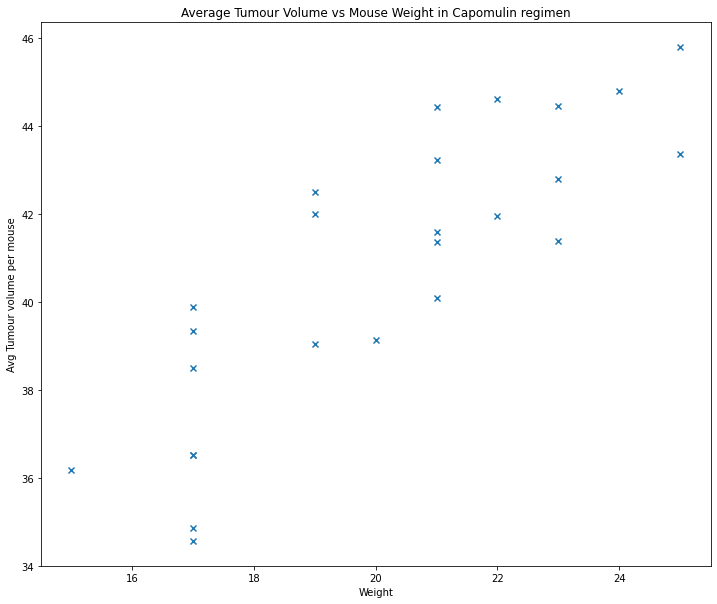

In [173]:
# Generate a scatter plot of average tumour volume vs. mouse weight for the Capomulin regimen
#average of all data per mouse in treatment
avg_tumour_vol =Capomulin_df.groupby(['Mouse ID']).mean()
X_axis = avg_tumour_vol['Weight (g)']
y_axis = avg_tumour_vol['Tumour Volume (mm3)']

plt.figure(figsize =(12, 10))
plt.scatter(X_axis,y_axis, marker='x')
plt.title('Average Tumour Volume vs Mouse Weight in Capomulin regimen')
plt.xlabel("Weight")
plt.ylabel("Avg Tumour volume per mouse")
plt.show()

## Correlation and Regression

ValueError: x and y must be the same size

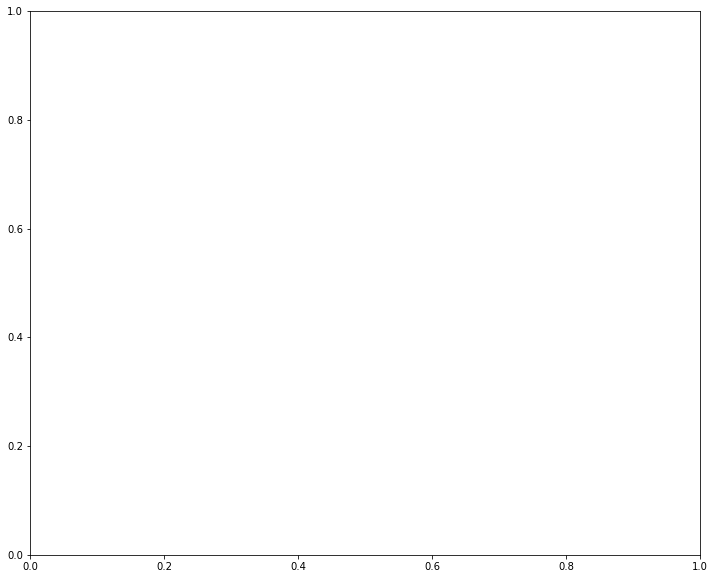

In [186]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumour volume for the Capomulin regimen

avg_tumour_vol =Capomulin_df.groupby(['Mouse ID']).mean()
X_axis = avg_tumour_vol['Weight (g)']
y_axis = avg_tumour_vol['Tumour Volume (mm3)']

(slope, intercept, rvalue, pvalue, stderr) = linregress(X_axis, y_axis )
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.figure(figsize =(12, 10))
plt.scatter(x_axis, y_axis, marker='x')
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.show()


print(f"The correlation coefficient  Mouse Weight and Tumour Volume within the Capomulin regimen is {round(st.pearsonr(avg_tumour_vol['Weight (g)'],avg_tumour_vol['Tumour Volume (mm3)'])[0],2)}")

